<a href="https://colab.research.google.com/github/tfortammi/pun-detector/blob/master/Converging_meanings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dappity Dap

### Characteristics of Puns
* Converging Meanings 
* Sound 
* Association


### Target: Converging Meanings

We have observed that puns often make use of words that have very similar meanings. For example:

'He said I was **average** - but he was just being **mean**.'

where 'average' and 'mean' have the same meanings but are expressed differently. 

___

In order to test this, we will do the following:

* Step 1: Use Synset to list synonyms of tokens
* Step 2: Find common words in Synsets within a sentence
* Step 3: Determine correlation between converging meanings & whether a sentence is a pun or not

---

Import/Download relevant packages:

In [0]:
from textblob import Word
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


For this method, we will use NLTK's WordNet corpus to find the synsets of each token in a sentence.

As an example, let's test it out on the word **'plant'** first:

In [0]:
word = Word('plant')
for i in range(3):
    print('Use Case ', i)
    print(word.synsets[i])
    print(word.definitions[i])
    print(word.synsets[i].lemma_names())
    print(' ')

Use Case  0
Synset('plant.n.01')
buildings for carrying on industrial labor
['plant', 'works', 'industrial_plant']
 
Use Case  1
Synset('plant.n.02')
(botany) a living organism lacking the power of locomotion
['plant', 'flora', 'plant_life']
 
Use Case  2
Synset('plant.n.03')
an actor situated in the audience whose acting is rehearsed but seems spontaneous to the audience
['plant']
 


Through WordNet, the **use cases** (Synsets) of the word "Plant" can be found, as well as the **definitions** and **Synonyms** (Lemma Names) as the input.

---
        
           
Let's first eyeball how relevant the lemmas of each significant word in a sentence to determining if a sentence is a pun. 

**The example we will use is: "The past, the present and the future walked into a bar. It was tense."**



In [0]:
# First, importing relevant packages, etc

import codecs
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import PunktSentenceTokenizer,sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We'll need to process the sentence, which includes lemmatizing, filtering out stop words, stripping punctuation and tokenizing the sentence.

In [0]:
def simpleFilter(sentence):
    
    '''This function filters out stopwords, lemmatizes, tokenizes, and 
    strips punctuation from the input sentence and returns the a list of 
    filtered tokens'''
    
    filtered_sent = []
    
    # Strip punctuation
    stripped = re.sub("[(.)',=?!#@]", '', sentence)
        
    # filter out stopwords 
    stop_words = set(stopwords.words("english"))
    
    # Tokenize
    words = word_tokenize(stripped)
    
    # Lemmatize and Filter out Stopwords
    lemmatizer = WordNetLemmatizer()
    for w in words:
        if w not in stop_words:
            filtered_sent.append(lemmatizer.lemmatize(w))

    return filtered_sent
  
def printLemmas(word):
    
    '''This function prints out all synonyms of a given word.'''
    
    for ss in Word(word).synsets:
        print(ss.lemma_names())
        

# Print 

s = 'The past, the present and the future walked into a bar. It was tense.'

for word in simpleFilter(s):
    print("Filtered word: '" + word + "' and its lemmas:")
    printLemmas(word)
    print()




Filtered word: 'The' and its lemmas:

Filtered word: 'past' and its lemmas:
['past', 'past_times', 'yesteryear']
['past']
['past', 'past_tense']
['past']
['past', 'preceding', 'retiring']
['by', 'past']

Filtered word: 'present' and its lemmas:
['present', 'nowadays']
['present']
['present', 'present_tense']
['show', 'demo', 'exhibit', 'present', 'demonstrate']
['present', 'represent', 'lay_out']
['stage', 'present', 'represent']
['present', 'submit']
['present', 'pose']
['award', 'present']
['give', 'gift', 'present']
['deliver', 'present']
['introduce', 'present', 'acquaint']
['portray', 'present']
['confront', 'face', 'present']
['present']
['salute', 'present']
['present']
['present']

Filtered word: 'future' and its lemmas:
['future', 'hereafter', 'futurity', 'time_to_come']
['future', 'future_tense']
['future']
['future']
['future']
['future', 'next', 'succeeding']
['future']

Filtered word: 'walked' and its lemmas:
['walk']
['walk']
['walk']
['walk']
['walk']
['walk']
['walk']
[

---
## **Hypothesis 1: Converging Meaning Pun**

We observe that the word 'tense' appears as a synonym of the words 'present', 'past', and 'future'. Since we are exploring puns with converging meanings, **we hypothesise that we are more likely to find words with converging meanings in puns than in non-puns.**

---

To do this, we first produce a list of unique synonyms of a certain word, excluding the word itself.


Let's try this on the word "plant".

In [0]:
def create_lemmas(word):
    lemmas_list = []
    for ss in Word(word).synsets:
        lemmas_list.append(ss.lemma_names())
    return lemmas_list

def process_lemmas(lemmas_list, word):
    '''
    This function process the lemma list of all the definition of a word
    and returns a list of all associated unrepeated words with the word
    '''
    all_lemmas = []
    for each_list in lemmas_list:
        for lemma in each_list:
            if lemma != word and lemma not in all_lemmas:
                all_lemmas.append(lemma)
    return all_lemmas


print(process_lemmas(create_lemmas('plant'), 'plant'))

['works', 'industrial_plant', 'flora', 'plant_life', 'set', 'implant', 'engraft', 'embed', 'imbed', 'establish', 'found', 'constitute', 'institute']


Next, we have to find out if synonyms of any word in a sentence can be found in the rest of the sentence, and count the number of times this occurs.

In [0]:
def common_syn(s):
    
    '''
    This function takes in a sentence, processes and tokenizes it and
    prints each significant word and tests if its synonyms can be found
    in the rest of the sentence. It prints the pair and returns the
    number of pairs found.
    '''
    
    count = 0
    
    # Filter the sentence to remove filler words / stopwords
    filtered_words = simpleFilter(s)
    
    for index, word in enumerate(filtered_words):
        if word.isalpha():
            lemma_list_of_term = process_lemmas(create_lemmas(word),word)

            # test if any word in the rest of the sentence appears in the lemma list of current word
            for other_word in filtered_words[index+1:]:
                if other_word in ' '.join(lemma_list_of_term):
                    count += 1
                    print(word, other_word)
    return count
    
    
s = 'The past, the present and the future walked into a bar. It was tense.'
print('The number of synonym pairs in this sentence is',common_syn(s))

past tense
present tense
future tense
The number of synonym pairs in this sentence is 3


In order to see if this method does work, we will test it out on our list of pre-tagged puns and non-puns where puns are tagged '0' and non-puns are tagged '1'

We import the list and apply our function common_syn to it, under the label 'Syn Count'.

In [0]:
import pandas as pd
df = pd.read_csv('puns_final.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df['Syn Count'] = df['Sentence'].apply(common_syn)
df

tuna fish
I le
bigger le
bed le
I le
pirate high
pirate sea
make hit
I one
Going sound
bed sleep
After ate
said ate
turned around
broke leg
I one
got one
cannibal eat
got make
paid make
reversing back
I one
got one
got back
one I
go work
Cheap u
Thrills u
want u
post office
wear wear
look see
whistle whistle
mad hare
Old go
die go
back second
call phone
Cell phone
mean egg
laying egg
I number
people wash
little light
seems see
door door
take make
fly fly
like like
metal met
I 5
mean end
went low
wardrobe closet
one I
punch punch
went last
Do get
know get
broth stock
cat sick
cheese cheese
Buffalo Bison
Make one
call one
right -
duck put
Thieves steal
dentist tooth
theatrical performance
pun play
pun word
play word
average mean
In I
past tense
present tense
future tense
soda soda
running go
Better go
present tense
past tense
saw ad
happens come
Id I
Id I
know get
alarm clock
Have eat
ever time
tried time
clock time
take make
seasoned veteran
remember back
boomerang back
I atom
error err

,Sentence,P/NP,Syn Count
0,"You can tune a guitar, but you can't tuna fish...",1,1
1,Two peanuts were walking in a tough neighborho...,1,0
2,If I buy a bigger bed will I have more or less...,1,4
3,The earth's rotation really makes my day.,1,0
4,I told my friend she drew her eyebrows too hig...,1,0
5,Novice pirates make terrible singers because t...,1,3
6,"This is not alcohol, water you thinking?!",1,0
7,Two ropes were walking in a tough neighborhood...,1,0
8,The show was called Spongebob Squarepants but ...,1,0
9,"I, for one, like Roman numerals.",1,1


To find out if this method is accurate, we use the correlation between whether the sentence is a pun or not and the Syn Count. 

In [0]:
corr = df.corr()
corr

,P/NP,Syn Count
P/NP,1.000000,-0.241952
Syn Count,-0.241952,1.000000


In this case, it appears the Syn Count is not very highly correlated with whether the sentence is a pun or not...

Perhaps we should try a different approach.

---

Other than the ability to find synonyms, WordNet can also find out a range of other details about a word.  

Let's use the words 'happy' and 'cutlery' to see what kind of details WordNet can figure out about a word.

In [0]:
print("The following are synonyms of 'happy':")
for x in get_all_synsets('happy'):
    print(x)
print()
print("The following are hyponyms (words that are more specific) of 'cutlery':")
for x in get_all_hyponyms('cutlery'):
    print(x)
print()
print("The following are similar to 'happy':")
for x in get_all_similar_tos('happy'):
    print(x)
print()
print("The following are antonyms (opposite) of 'happy':")
for x in get_all_antonyms('happy'):
    print(x)
print()
print("The following are words that should also be seen with 'happy':")
for x in get_all_also_sees('happy'):
    print(x)
 

The following are synonyms of 'happy':
('happy', 'happy.a.01')
('felicitous', 'felicitous.s.02')
('happy', 'felicitous.s.02')
('glad', 'glad.s.02')
('happy', 'glad.s.02')
('happy', 'happy.s.04')
('well-chosen', 'happy.s.04')

The following are hyponyms (words that are more specific) of 'cutlery':
('bolt_cutter', 'bolt_cutter.n.01')
('cigar_cutter', 'cigar_cutter.n.01')
('die', 'die.n.03')
('edge_tool', 'edge_tool.n.01')
('glass_cutter', 'glass_cutter.n.03')
('tile_cutter', 'tile_cutter.n.01')
('fork', 'fork.n.01')
('spoon', 'spoon.n.01')
('Spork', 'spork.n.01')
('table_knife', 'table_knife.n.01')

The following are similar to 'happy':
('blessed', 'blessed.s.06')
('blissful', 'blissful.s.01')
('bright', 'bright.s.09')
('golden', 'golden.s.02')
('halcyon', 'golden.s.02')
('prosperous', 'golden.s.02')
('laughing', 'laughing.s.01')
('riant', 'laughing.s.01')
('fortunate', 'fortunate.a.01')
('willing', 'willing.a.01')
('felicitous', 'felicitous.a.01')

The following are antonyms (opposite) 

The functions below make use of WordNet to yield synonyms, hyponyms, antonyms, words that are similar to as well as words that the WordNet corpus has recorded as "also sees".

In [0]:
from nltk.corpus import wordnet as wn

def get_all_synsets(word, pos=None):
    for ss in wn.synsets(word):
        for lemma in ss.lemma_names():
            yield (lemma, ss.name())


def get_all_hyponyms(word, pos=None):
    for ss in wn.synsets(word, pos=pos):
            for hyp in ss.hyponyms():
                for lemma in hyp.lemma_names():
                    yield (lemma, hyp.name())


def get_all_similar_tos(word, pos=None):
    for ss in wn.synsets(word):
            for sim in ss.similar_tos():
                for lemma in sim.lemma_names():
                    yield (lemma, sim.name())


def get_all_antonyms(word, pos=None):
    for ss in wn.synsets(word, pos=None):
        for sslema in ss.lemmas():
            for antlemma in sslema.antonyms():
                    yield (antlemma.name(), antlemma.synset().name())


def get_all_also_sees(word, pos=None):
        for ss in wn.synsets(word):
            for also in ss.also_sees():
                for lemma in also.lemma_names():
                    yield (lemma, also.name())


def get_all_synonyms(word, pos=None):
    for x in get_all_synsets(word, pos):
        yield (x[0], x[1], 'ss')
    for x in get_all_hyponyms(word, pos):
        yield (x[0], x[1], 'hyp')
    for x in get_all_similar_tos(word, pos):
        yield (x[0], x[1], 'sim')
    for x in get_all_antonyms(word, pos):
        yield (x[0], x[1], 'ant')
    for x in get_all_also_sees(word, pos):
        yield (x[0], x[1], 'also')
       

Let's all the categories above words that are **related** to the main word. 

Now, we want to do the same as we did for the synonym count and define some functions that will find the common related words - not just within the sentence, but also with the related words of the other words in the sentence. 

**Example:**

'What do you call a belt with a watch on it? A waist of time.'

In [0]:
def related_list(word):
    lemma_list = []
    for x in get_all_synonyms(word):
        lemma_list.append(x)
        for y in get_all_synonyms(x[0]):
            lemma_list.append(y)
    return list(set(lemma_list))

def common_related(s):
    filtered = simpleFilter(s)
    count = 0
    for index, word in enumerate(filtered):
        related = related_list(word)
        for r_set in related:
            if r_set[0] in filtered[index+1:]:
                count += 1
    return count


In [0]:
s = 'What do you call a belt with a watch on it? A waist of time.'

filtered = simpleFilter(s)
count = 0
print('Sentence:',s)
print(filtered)
print('-----' *10)
print()
for index, word in enumerate(filtered):
    related = related_list(word)
    for r_set in related:
        if r_set[0] in filtered[index+1:]:
            print("The word '" + word + "' in the sentence is related to '" + r_set[0] + "' as", r_set, "to mean '" + wordnet.synset(r_set[1]).definition() +"'")
            print()
            
            count += 1
print('-----' * 10)
print('Number of Related pairs:', count)
print()


Sentence: What do you call a belt with a watch on it? A waist of time.
['What', 'call', 'belt', 'watch', 'A', 'waist', 'time']
--------------------------------------------------

The word 'call' in the sentence is related to 'watch' as ('watch', 'determine.v.08', 'ss') to mean 'find out, learn, or determine with certainty, usually by making an inquiry or other effort'

The word 'call' in the sentence is related to 'time' as ('time', 'prison_term.n.01', 'hyp') to mean 'the period of time a prisoner is imprisoned'

The word 'call' in the sentence is related to 'watch' as ('watch', 'watch.v.03', 'ss') to mean 'see or watch'

The word 'watch' in the sentence is related to 'time' as ('time', 'time.v.03', 'hyp') to mean 'set the speed, duration, or execution of'

--------------------------------------------------
Number of Related pairs: 4



Now we want to apply this to the rest of our data.

In [0]:
def num_words(s):
    sentence = s.split()
    num_words = len(sentence)
    return num_words

df['Related Count'] = df['Sentence'].apply(common_related)
df['Length'] = df['Sentence'].apply(num_words)
df['Rel Count / Len'] = df['Related Count'] / df['Length']
df.sample(5)

,Sentence,P/NP,Syn Count,Related Count,Length,Rel Count / Len
483,You can search throughout the entire universe ...,0,5,32,46,0.695652
468,Success comes from knowing that you did your b...,0,0,16,19,0.842105
425,There is nothing I would not do for those who ...,0,0,4,28,0.142857
503,Wit is the lowest form of humor,0,1,8,7,1.142857
302,Friendship is born at the moment when one man...,0,4,31,22,1.409091


Here is a description of the values. 

In [0]:
import matplotlib.pyplot as plt
df.describe()


,P/NP,Syn Count,Related Count,Length,Rel Count / Len
count,522.00000,522.000000,522.000000,522.000000,522.000000
mean,0.50000,0.977011,19.545977,15.040230,0.964886
std,0.50048,2.504401,57.173598,8.784928,1.814452
min,0.00000,0.000000,0.000000,5.000000,0.000000
25%,0.00000,0.000000,0.000000,10.000000,0.000000
50%,0.50000,0.000000,3.000000,13.000000,0.230769
75%,1.00000,1.000000,16.750000,16.000000,1.093168
max,1.00000,32.000000,813.000000,74.000000,15.625000


The code below finds the correlation between the different variables in the data frame. 

As can be seen, the correlation between whether a sentence is a pun or not and the number of related count pairs is debatable.

We also took related count / len of sentence as a longer sentence is more likely to have more related pairs.

In [0]:
corr = df.corr()
corr

,P/NP,Syn Count,Related Count,Length,Rel Count / Len
P/NP,1.000000,-0.241952,-0.200865,-0.381330,-0.154173
Syn Count,-0.241952,1.000000,0.596042,0.654087,0.406106
Related Count,-0.200865,0.596042,1.000000,0.598361,0.759567
Length,-0.381330,0.654087,0.598361,1.000000,0.316411
Rel Count / Len,-0.154173,0.406106,0.759567,0.316411,1.000000


In [0]:
sum_pun = df.loc[df['P/NP'] == 0]['Rel Count / Len'].sum()
len_pun = len(df.loc[df['P/NP'] == 0]['Rel Count / Len'])
mean_pun = sum_pun / len_pun
print('Mean Related count / len for Puns is', mean_pun)

sum_non_pun = df.loc[df['P/NP'] == 1]['Rel Count / Len'].sum()
len_non_pun = len(df.loc[df['P/NP'] == 1]['Rel Count / Len'])
mean_non_pun = sum_non_pun / len_non_pun
print('Mean Related count / len for Non-Puns is', mean_non_pun)


Mean Related count / len for Puns is 1.2443563344509985
Mean Related count / len for Non-Puns is 0.6854153935930384


We'll try to turn this correlation into an actionable "algorithm" to predict if a sentence is a pun or not. 

The following is another data set with 60 puns and 100 non-puns.

In [0]:
test_df = pd.read_csv('puns_test.csv')
test_df['Rel Count'] = test_df['Sentence'].apply(common_related)
test_df['Length'] = test_df['Sentence'].apply(num_words)
test_df['Rel Count / Len'] = test_df['Rel Count'] / test_df['Length']
test_df.sample(5)

,Sentence,P/NP,Rel Count,Length,Rel Count / Len
10,What does a clock do when it's hungry? It goes...,0,50,13,3.846154
127,There are only three things women need in life...,1,39,13,3.000000
4,"A scarecrow says, ""This job isn't for everyone...",0,0,14,0.000000
34,The soldier who survived mustard gas and peppe...,0,5,13,0.384615
145,World War II ended the Great Depression with o...,1,29,20,1.450000


Let's now code the "algorithm".

To do so, we need to know the threshold that we will use to determine if a sentence is a pun or not, based on the related pair count. 

Let's try using the mean Rel Count / Len first

In [0]:
def rel_count_predict(s, threshold=1.2443563344509985):
    rel_count = common_related(s)
    rel_count_len = rel_count / num_words(s)
    if rel_count_len >= threshold:
        return 0
    else:
        return 1

test_df['Predicted by Rel Count / Len'] = test_df['Sentence'].apply(rel_count_predict)
test_df.sample(5)

,Sentence,P/NP,Rel Count,Length,Rel Count / Len,Predicted by Rel Count / Len
133,"All of my friends are animal people. To me, ca...",1,97,42,2.309524,0
29,What should you do if you’re cold? Stand in th...,0,0,14,0.000000,1
74,"You can never stop and as older people, we hav...",1,80,35,2.285714,0
90,"One goes through school, college, medical scho...",1,74,22,3.363636,0
95,By recollecting the pleasures I have had forme...,1,48,33,1.454545,0


The accuracy rate is 0.36075949367088606


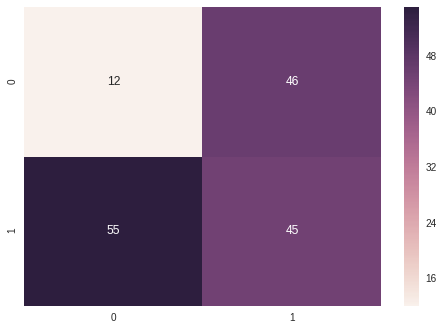

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

y_true = test_df['P/NP']
y_pred = test_df['Predicted by Rel Count / Len']


sns.set()
sns.heatmap(cm_df, annot=True)

print('The accuracy rate is', accuracy_score(y_true, y_pred))

From the code above, it appears that we're getting a 36% accuracy rate.